In [1]:
# this is jut to view the wide window in jupyter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define functions

In [3]:
def extract_region(df, chromosome, down_region, up_region, function=None):
    region_df = df[(df['end'] >= down_region) & (df['start'] <= up_region) & 
                   (df['seqname'].str.contains(chromosome))]
    header = region_df[['seqname','end']]
    values = region_df.iloc[:, 3:] # take only columns after "end" column
    if function == None:
        return pd.concat([header, values], axis=1)
    else:
        values_func = function(values).replace(-np.inf, 0)
        return pd.concat([header, values_func], axis=1)
# consider split the above function in two and put the scaled function as below
def scale_data(df,function):
    header = df[['seqname','end']]
    values = df.iloc[:, 3:] # take only columns after "end" column
    values_func = function(values).replace(-np.inf, 0)
    return pd.concat([header, values_func], axis=1)

def transpose_df(df):    
    df_t = df.set_index(['seqname', 'end']).T
    return df_t

def plot_culstermap_col(df, fig_size=(25,300)):
    colors = ["orange", "lightgray"] 
    cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    cluster = sns.clustermap(df,
                            cmap=cmap,
                            cbar=False,
                            vmin=0,
                            col_cluster=False,
                            # row_cluster = False, # avoid cluster rows
                            figsize=fig_size,
                            cbar_pos=(0, .4, .005, .4),
                            dendrogram_ratio=(.0001, .005))
    plt.setp(cluster.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
    plt.setp(cluster.ax_heatmap.yaxis.get_majorticklabels(), fontsize=15)
    return cluster

def drop_columns_rex(df, string):
    droped_df = df.set_index(['seqname', 'start', 'end']).drop(df.filter(regex=string).columns, axis=1)
    return droped_df.reset_index()

def drop_columns_list(df,sample_list):
    droped_df = df.set_index(['seqname', 'start', 'end']).drop(my_list, axis=1)
    return droped_df.reset_index()

def select_genotypes(df, sample_list):
    filter_df = df.set_index(['seqname', 'start', 'end']).filter(items=sample_list, axis=1)
    return filter_df.reset_index()

def chr_length(df, chromosome):
    len_df = pd.read_csv(df, delimiter='\t', header=None)
    return len_df[len_df[0].str.contains(f'{chromosome}')][1].values[0]

In [4]:
#Path to the files

# data_path = '/Volumes/quirozj/09_watseq/03_haplotypes/ibspy_analysis/ibspy_combined/variations/all_assemblies_ibspy_variaitons'
data_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/0_IBSpy_data'
chr_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/00_genome_sizes/'

In [67]:
# Define arguments chinese
window = 50000
function = np.sqrt
reference = 'sy_mattis'

In [68]:
in_file = pd.read_csv(f'{data_path}/{reference}_combined_queries_{window}w.tsv.gz', delimiter='\t')
in_file

,seqname,start,end,arina-10x_nuq,arina-pg,cadenza-10.4x_nuq,cadenza-15x_nuq,chinese-10x_nuq,chinese-pg,claire-10x_nuq,...,WATDE0159,WATDE0638,WATDE0758,WATDE0667,Urban,WATDE0850,Boreonos,WATDE1058,WATDE0929,WATDE0370
0,chr1A_WhSYM,1,50000,0,1,389,383,383,391,392,...,389,9,401,391,379,369,393,412,393,383
1,chr1A_WhSYM,50001,100000,3,1,601,594,586,592,597,...,612,36,602,613,598,608,604,603,603,600
2,chr1A_WhSYM,100001,150000,0,1,513,514,511,509,519,...,513,10,526,519,530,513,514,531,518,527
3,chr1A_WhSYM,150001,200000,1,3,481,470,451,462,481,...,486,16,483,469,480,468,478,482,474,498
4,chr1A_WhSYM,200001,250000,1,1,465,463,444,460,453,...,458,11,475,449,444,456,442,469,465,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299116,chrUn_WhSYM,956600001,956650000,11,54,27,27,26,68,7,...,15,23,19,21,26,25,31,19,20,27
299117,chrUn_WhSYM,956650001,956700000,3,32,10,9,4,37,2,...,5,5,5,5,6,6,9,7,6,7
299118,chrUn_WhSYM,956700001,956750000,0,33,3,3,2,41,0,...,2,6,4,3,6,4,14,4,12,13
299119,chrUn_WhSYM,956750001,956800000,1,40,2,2,1,32,2,...,5,4,6,5,4,7,5,7,6,7


## Filter samples

In [69]:
droped_file = drop_columns_rex(in_file,'BW_')
# droped_file = in_file
droped_file

,seqname,start,end,arina-10x_nuq,arina-pg,cadenza-10.4x_nuq,cadenza-15x_nuq,chinese-10x_nuq,chinese-pg,claire-10x_nuq,...,WATDE0159,WATDE0638,WATDE0758,WATDE0667,Urban,WATDE0850,Boreonos,WATDE1058,WATDE0929,WATDE0370
0,chr1A_WhSYM,1,50000,0,1,389,383,383,391,392,...,389,9,401,391,379,369,393,412,393,383
1,chr1A_WhSYM,50001,100000,3,1,601,594,586,592,597,...,612,36,602,613,598,608,604,603,603,600
2,chr1A_WhSYM,100001,150000,0,1,513,514,511,509,519,...,513,10,526,519,530,513,514,531,518,527
3,chr1A_WhSYM,150001,200000,1,3,481,470,451,462,481,...,486,16,483,469,480,468,478,482,474,498
4,chr1A_WhSYM,200001,250000,1,1,465,463,444,460,453,...,458,11,475,449,444,456,442,469,465,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299116,chrUn_WhSYM,956600001,956650000,11,54,27,27,26,68,7,...,15,23,19,21,26,25,31,19,20,27
299117,chrUn_WhSYM,956650001,956700000,3,32,10,9,4,37,2,...,5,5,5,5,6,6,9,7,6,7
299118,chrUn_WhSYM,956700001,956750000,0,33,3,3,2,41,0,...,2,6,4,3,6,4,14,4,12,13
299119,chrUn_WhSYM,956750001,956800000,1,40,2,2,1,32,2,...,5,4,6,5,4,7,5,7,6,7


In [70]:
%%time
def transform_df(df, value):
    df_t = df.set_index(['seqname','start', 'end'])
    df_1 = df_t.where(df_t > value, 0)
    df_out = df_1.where(df_1 < value, 1).reset_index()
    return df_out

# x_df = transform_df(droped_file, 130)
# x_df

CPU times: user 9 µs, sys: 9 µs, total: 18 µs
Wall time: 43.9 µs


In [ ]:
# chromosome='chr2B'
# chr_len = chr_path+f'chr_sizes_{reference}.genome.txt'
# down_region = 0
# # up_region = chr_length(chr_len, chromosome)
# up_region = 150000000

# region = extract_region(x_df, chromosome, down_region, up_region)
# region

In [ ]:
# %%time
# region_t = transpose_df(region)
# region_t

In [71]:
# hap_path='/Users/quirozc/Documents/PhD_2020/16_watseq/22_paul/06_hap_names/'
my_list = pd.read_csv('ventricosa_genotypes.tsv')['genotype'].tolist()
filtered_file = select_genotypes(in_file, my_list)
filtered_file

,seqname,start,end,mattis-pg,ventricosa-10x_nuq,Alert,Becard_Kachu,borlaug-pg,Cimcog26,Cimcog49,...,jagger-pg,mace-pg,stanley-pg,arina-pg,chinese-pg,julius-pg,lancer-pg,landmark-pg,norin61-pg,spelt-pg
0,chr1A_WhSYM,1,50000,0,536,388,409,409,393,34,...,396,393,399,1,391,392,388,416,393,421
1,chr1A_WhSYM,50001,100000,0,693,623,643,640,652,53,...,603,595,600,1,592,605,593,597,599,611
2,chr1A_WhSYM,100001,150000,0,711,526,536,532,527,28,...,523,507,523,1,509,518,508,518,515,526
3,chr1A_WhSYM,150001,200000,0,720,482,474,486,486,35,...,484,478,475,3,462,482,479,481,472,497
4,chr1A_WhSYM,200001,250000,0,622,446,440,478,446,14,...,465,454,480,1,460,468,457,471,460,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299116,chrUn_WhSYM,956600001,956650000,0,40,23,37,48,32,18,...,53,62,98,54,68,57,66,76,60,57
299117,chrUn_WhSYM,956650001,956700000,0,64,10,9,32,5,5,...,40,32,43,32,37,43,42,46,36,32
299118,chrUn_WhSYM,956700001,956750000,0,46,5,10,32,10,6,...,41,39,62,33,41,44,40,53,43,34
299119,chrUn_WhSYM,956750001,956800000,0,28,2,6,29,9,7,...,41,42,44,40,32,34,40,45,30,33


In [72]:
from matplotlib.colors import LinearSegmentedColormap
def plot_culstermap_col(df, fig_size=(25,300)):
    colors = ["darkorange","lightgray"] 
    cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    cluster = sns.clustermap(df,
                            cmap=cmap,
#                             linewidths=10,
#                             tree_kws=dict(linewidths=1.5, colors=(0.2, 0.2, 0.4)),
                            cbar=False,
                            vmin=0,
                            col_cluster=False,
                            row_cluster = False, # avoid cluster rows
                            figsize=fig_size,
                            cbar_pos=(0, .4, .005, .4),
                            dendrogram_ratio=(.0001, .005))
    for a in cluster.ax_row_dendrogram.collections:
        a.set_linewidth(10)
    
    plt.setp(cluster.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
    plt.setp(cluster.ax_heatmap.yaxis.get_majorticklabels(), fontsize=15)
    return cluster

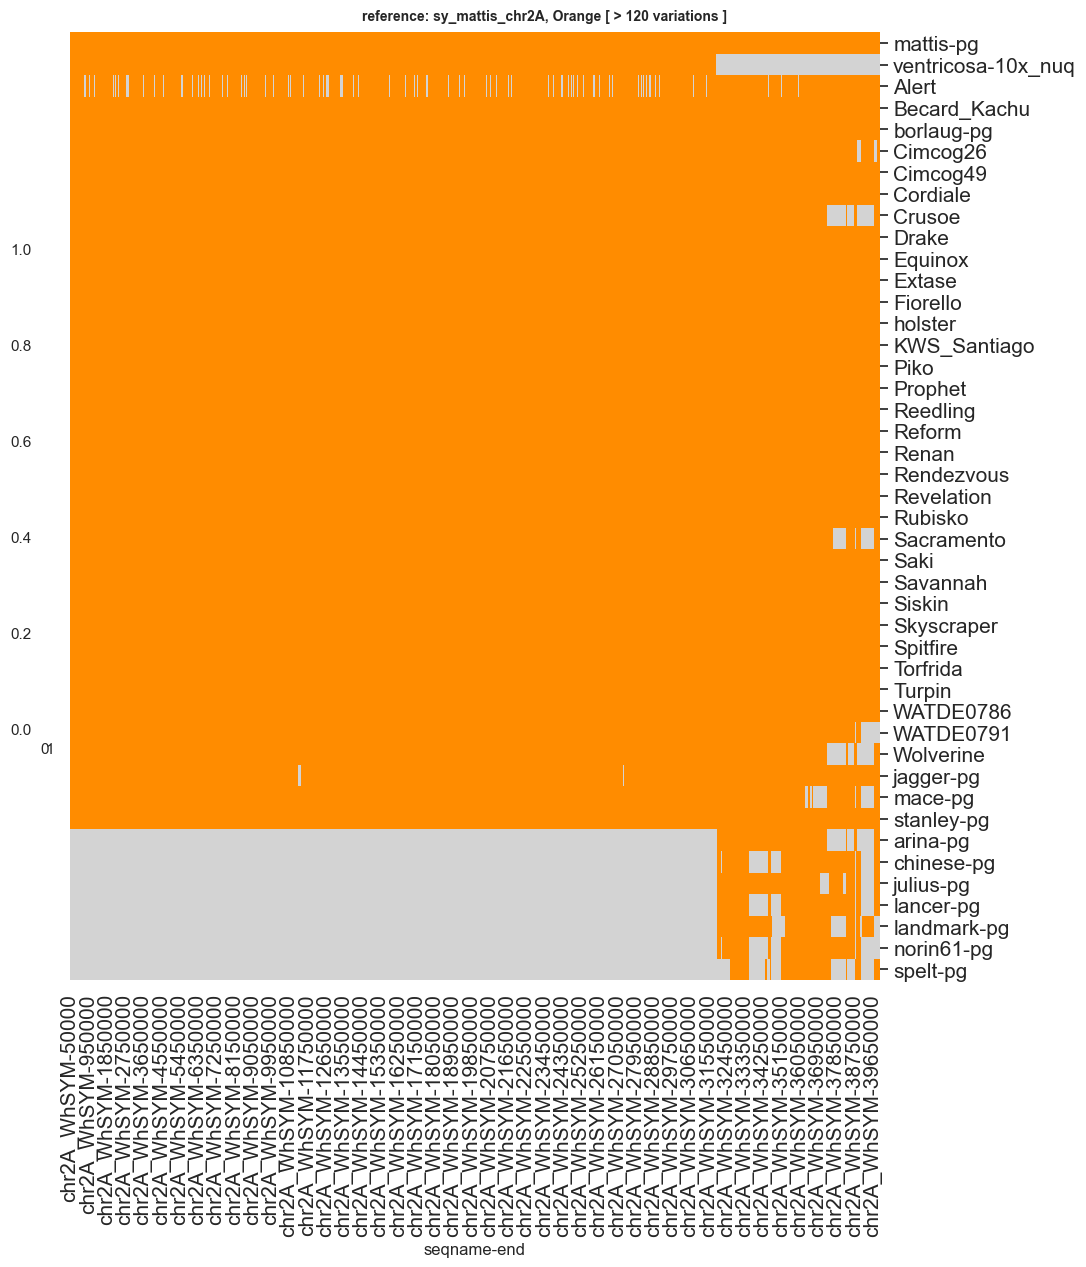

In [81]:
fig_size=(10,12)
down_region = 0
up_region = 40000000
chromosome ='chr2A'
filter_v = 120
# x_df = transform_df(filtered_file, 128)
# x_df
# chromosomes = filtered_file['seqname'].unique().tolist()
chromosomes =['chr2A']
for chromosome in chromosomes:
    df_t = transpose_df(extract_region(transform_df(filtered_file, filter_v), chromosome, down_region, up_region))
    plot_culstermap_col(df_t, fig_size).fig.suptitle(f'reference: {reference}_{chromosome}, Orange [ > {filter_v} variations ]', fontsize=10, weight="bold", x=0.5, y=1)
#     plt.savefig(f'{chromosome}_{reference}_clustermap.jpg', dpi=70, bbox_inches='tight')

In [40]:
my_list = pd.read_csv('ventricosa_7D_mattis.tsv')['genotype'].tolist()
filtered_file = select_genotypes(in_file, my_list)
filtered_file

,seqname,start,end,mattis-pg,ventricosa-10x_nuq,Piko,Revelation,holster,Renan,Rendezvous,jagger-pg,mace-pg,stanley-pg,arina-pg,chinese-pg,julius-pg,lancer-pg,landmark-pg,norin61-pg,spelt-pg
0,chr1A_WhSYM,1,50000,0,536,390,391,379,398,388,396,393,399,1,391,392,388,416,393,421
1,chr1A_WhSYM,50001,100000,0,693,596,602,596,608,613,603,595,600,1,592,605,593,597,599,611
2,chr1A_WhSYM,100001,150000,0,711,530,521,507,525,529,523,507,523,1,509,518,508,518,515,526
3,chr1A_WhSYM,150001,200000,0,720,487,485,470,497,463,484,478,475,3,462,482,479,481,472,497
4,chr1A_WhSYM,200001,250000,0,622,461,461,443,458,463,465,454,480,1,460,468,457,471,460,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299116,chrUn_WhSYM,956600001,956650000,0,40,12,22,27,29,11,53,62,98,54,68,57,66,76,60,57
299117,chrUn_WhSYM,956650001,956700000,0,64,4,8,13,9,5,40,32,43,32,37,43,42,46,36,32
299118,chrUn_WhSYM,956700001,956750000,0,46,2,12,8,5,5,41,39,62,33,41,44,40,53,43,34
299119,chrUn_WhSYM,956750001,956800000,0,28,2,5,7,7,4,41,42,44,40,32,34,40,45,30,33


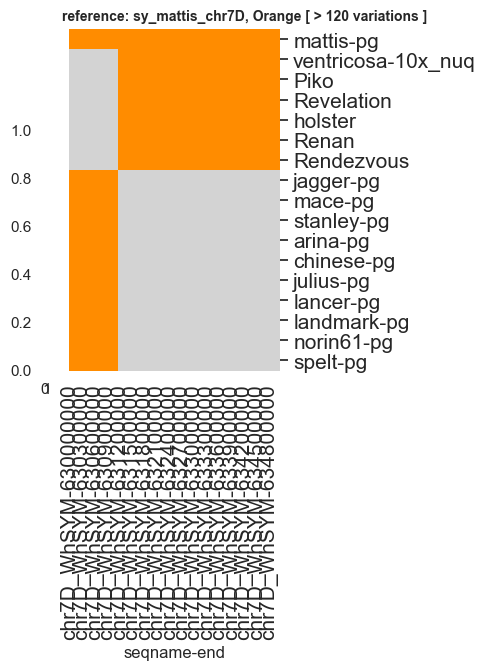

In [47]:
fig_size=(4,6)
down_region = 630000000
up_region = 800000000
# chromosome ='chr7D'
filter_v = 120
# x_df = transform_df(filtered_file, 128)
# x_df
# chromosomes = filtered_file['seqname'].unique().tolist()
chromosomes =['chr7D']
for chromosome in chromosomes:
    df_t = transpose_df(extract_region(transform_df(filtered_file, filter_v), chromosome, down_region, up_region))
    plot_culstermap_col(df_t, fig_size).fig.suptitle(f'reference: {reference}_{chromosome}, Orange [ > {filter_v} variations ]', fontsize=10, weight="bold", x=0.5, y=1)
#     plt.savefig(f'{chromosome}_{reference}_clustermap.jpg', dpi=70, bbox_inches='tight')

In [48]:
my_list = pd.read_csv('ventricosa_3D_mattis.tsv')['genotype'].tolist()
filtered_file = select_genotypes(in_file, my_list)
filtered_file

,seqname,start,end,mattis-pg,ventricosa-10x_nuq,Extase,jagger-pg,mace-pg,stanley-pg,arina-pg,chinese-pg,julius-pg,lancer-pg,landmark-pg,norin61-pg,spelt-pg
0,chr1A_WhSYM,1,50000,0,536,403,396,393,399,1,391,392,388,416,393,421
1,chr1A_WhSYM,50001,100000,0,693,611,603,595,600,1,592,605,593,597,599,611
2,chr1A_WhSYM,100001,150000,0,711,524,523,507,523,1,509,518,508,518,515,526
3,chr1A_WhSYM,150001,200000,0,720,488,484,478,475,3,462,482,479,481,472,497
4,chr1A_WhSYM,200001,250000,0,622,457,465,454,480,1,460,468,457,471,460,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299116,chrUn_WhSYM,956600001,956650000,0,40,18,53,62,98,54,68,57,66,76,60,57
299117,chrUn_WhSYM,956650001,956700000,0,64,6,40,32,43,32,37,43,42,46,36,32
299118,chrUn_WhSYM,956700001,956750000,0,46,3,41,39,62,33,41,44,40,53,43,34
299119,chrUn_WhSYM,956750001,956800000,0,28,6,41,42,44,40,32,34,40,45,30,33


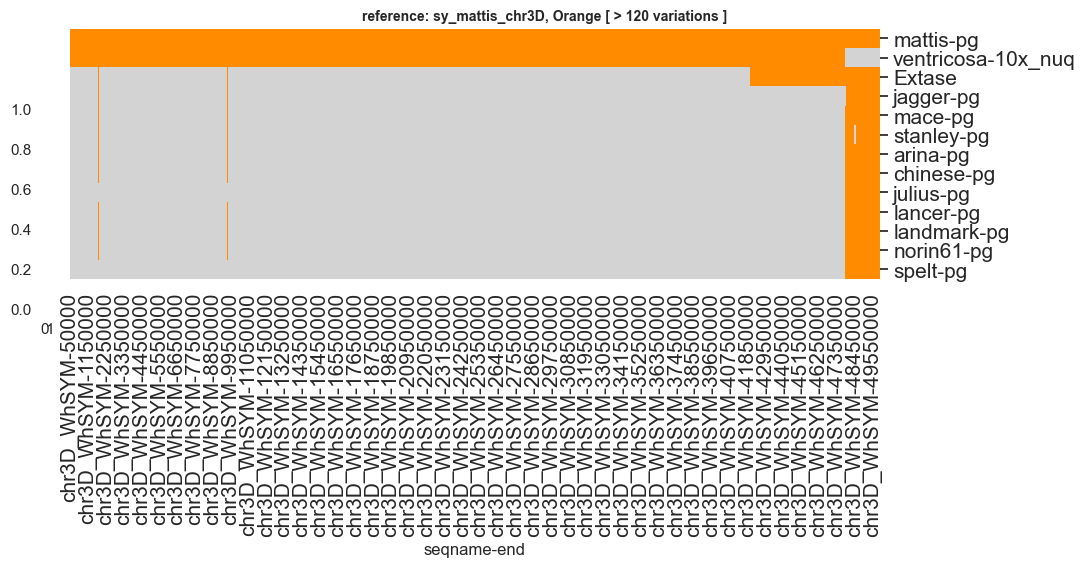

In [53]:
fig_size=(10,5)
down_region = 0
up_region = 50000000
# chromosome ='chr7D'
filter_v = 120
# x_df = transform_df(filtered_file, 128)
# x_df
# chromosomes = filtered_file['seqname'].unique().tolist()
chromosomes =['chr3D']
for chromosome in chromosomes:
    df_t = transpose_df(extract_region(transform_df(filtered_file, filter_v), chromosome, down_region, up_region))
    plot_culstermap_col(df_t, fig_size).fig.suptitle(f'reference: {reference}_{chromosome}, Orange [ > {filter_v} variations ]', fontsize=10, weight="bold", x=0.5, y=1)
#     plt.savefig(f'{chromosome}_{reference}_clustermap.jpg', dpi=70, bbox_inches='tight')

In [60]:
my_list = pd.read_csv('ventricosa_7D_jagger.tsv')['genotype'].tolist()
filtered_file = select_genotypes(in_file, my_list)
filtered_file

,seqname,start,end,jagger-pg,ventricosa-10x_nuq,Piko,Revelation,holster,Renan,Rendezvous,mattis-pg,mace-pg,stanley-pg,arina-pg,chinese-pg,julius-pg,lancer-pg,landmark-pg,norin61-pg,spelt-pg
0,chr1A_WhJag,1,50000,0,362,4,47,2,49,0,398,18,21,521,17,56,20,20,25,19
1,chr1A_WhJag,50001,100000,0,477,6,16,4,16,0,456,27,14,528,12,17,22,13,13,13
2,chr1A_WhJag,100001,150000,0,396,10,94,8,28,2,489,34,24,545,25,104,34,21,80,37
3,chr1A_WhJag,150001,200000,0,389,10,29,5,29,3,456,29,34,528,39,29,30,32,36,31
4,chr1A_WhJag,200001,250000,0,578,2,55,4,41,1,552,38,34,586,27,54,35,34,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291048,chrUn_WhJag,379600001,379650000,0,450,43,54,54,56,38,51,53,40,44,63,30,72,53,58,68
291049,chrUn_WhJag,379650001,379700000,0,439,55,57,59,51,63,59,73,82,62,71,55,112,73,65,85
291050,chrUn_WhJag,379700001,379750000,0,454,25,45,42,55,49,32,58,66,28,81,42,54,66,59,60
291051,chrUn_WhJag,379750001,379800000,0,454,38,70,45,36,61,41,58,41,36,58,34,51,52,62,66


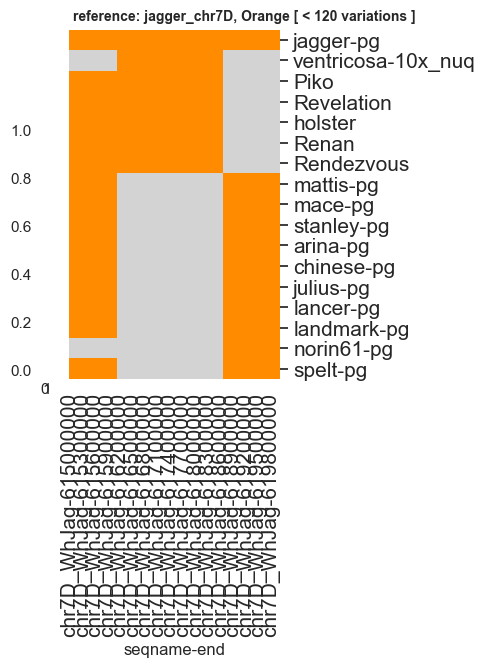

In [64]:
fig_size=(4,6)
down_region = 615000000
up_region = 620000000
# chromosome ='chr7D'
filter_v = 120
# x_df = transform_df(filtered_file, 128)
# x_df
# chromosomes = filtered_file['seqname'].unique().tolist()
chromosomes =['chr7D']
for chromosome in chromosomes:
    df_t = transpose_df(extract_region(transform_df(filtered_file, filter_v), chromosome, down_region, up_region))
    plot_culstermap_col(df_t, fig_size).fig.suptitle(f'reference: {reference}_{chromosome}, Orange [ < {filter_v} variations ]', fontsize=10, weight="bold", x=0.5, y=1)
#     plt.savefig(f'{chromosome}_{reference}_clustermap.jpg', dpi=70, bbox_inches='tight')